In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import os

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
train_dir = r'D:\Major Project\dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train'
validation_dir = r'D:\Major Project\dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid'
test_dir = r'D:\Major Project\dataset\test'

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input

In [39]:
train_datagen = ImageDataGenerator(zoom_range = 0.5,
                                   shear_range = 0.3,
                                  horizontal_flip = True,
                                  preprocessing_function = preprocess_input )

val_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(256,256),
batch_size=50,
class_mode = 'categorical')

validation_generator = val_datagen.flow_from_directory(
validation_dir,
target_size=(256,256),
batch_size=50,
class_mode = 'categorical')

num_classes = len(train_generator.class_indices) 

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [40]:
t_img , label = train_generator.next()

def plotImage (img_arr, label):
  for im , l in zip(img_arr , label):
    plt.figure(figsize=(5,5))
    plt.imshow(im)
    plt.show()

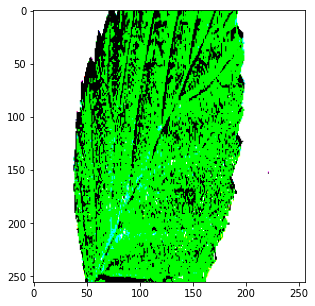

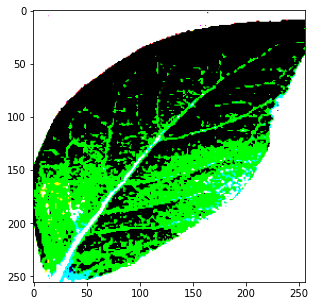

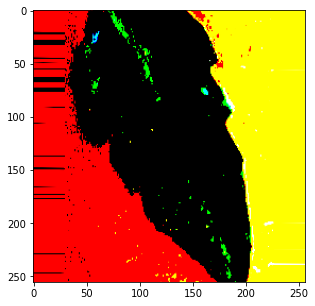

In [41]:
plotImage(t_img[:3],label[:3])

In [8]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(include_top = False,
                 input_shape = (256,256,3))

In [9]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(units = num_classes, activation='softmax'))

In [11]:
conv_base.trainable = False

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 8, 8, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               8388864   
_________________________________________________________________
dense_1 (Dense)              (None, 38)                9766      
Total params: 23,113,318
Trainable params: 8,398,630
Non-trainable params: 14,714,688
_________________________________________________________________


In [13]:
from tensorflow.keras import optimizers

model.compile(loss= keras.losses.categorical_crossentropy,
   optimizer='adam',
   metrics=['accuracy'])

In [14]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

#early stopping
earlyStopping = EarlyStopping(monitor= 'val_accuracy', min_delta = 0.01, patience = 3, verbose=1)

#model checkpoint
modelCheckpoint = ModelCheckpoint(filepath = "my_best_model_new.h5",
                     monitor= 'val_accuracy', 
                     min_delta = 0.01, 
                     patience = 3, 
                     verbose=1,
                     save_best_only = True)

callBack = [earlyStopping,modelCheckpoint]

In [15]:
model = keras.models.load_model("my_best_model.h5")

In [ ]:
history = model.fit(
    train_generator,
    epochs = 30,
    validation_data = validation_generator,
    callbacks = [callBack])

Epoch 1/30
1406/1406 [==============================] - 7237s 5s/step - loss: 0.2891 - accuracy: 0.9273 - val_loss: 0.2894 - val_accuracy: 0.9295

Epoch 00001: val_accuracy improved from -inf to 0.92955, saving model to my_best_model_new.h5
Epoch 2/30
1406/1406 [==============================] - 7219s 5s/step - loss: 0.2834 - accuracy: 0.9297 - val_loss: 0.2649 - val_accuracy: 0.9334

Epoch 00002: val_accuracy improved from 0.92955 to 0.93342, saving model to my_best_model_new.h5
Epoch 3/30
1406/1406 [==============================] - 7208s 5s/step - loss: 0.2850 - accuracy: 0.9304 - val_loss: 0.2371 - val_accuracy: 0.9446

Epoch 00003: val_accuracy improved from 0.93342 to 0.94457, saving model to my_best_model_new.h5
Epoch 4/30
1406/1406 [==============================] - 7201s 5s/step - loss: 0.2677 - accuracy: 0.9349 - val_loss: 0.2717 - val_accuracy: 0.9376

Epoch 00004: val_accuracy did not improve from 0.94457
Epoch 5/30
1406/1406 [==============================] - 7211s 5s/step

AttributeError: 'AxesSubplot' object has no attribute 'set_ylin'

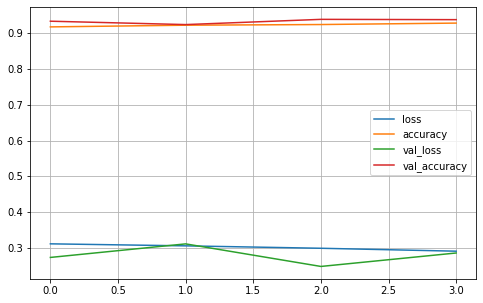

In [17]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylin(0,1)
plt.show()

In [18]:
hist_df = pd.DataFrame(history.history)

In [25]:
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode = 'w') as f:
    hist_df.to_csv(f)

In [26]:
model.evaluate_generator(validation_generator)

C:\ProgramData\Anaconda3\envs\Tensorflow\lib\site-packages\keras\engine\training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.2855658233165741, 0.9379695057868958]

In [28]:
ref = dict(zip(list(train_generator.class_indices.values()) ,list(train_generator.class_indices.keys())))

In [28]:
from keras.applications.imagenet_utils import preprocess_input

In [51]:
def prediction(path):
    
    img = tf.keras.utils.load_img(path, target_size=(256,256))
    
    i = tf.keras.preprocessing.image.img_to_array(img)
    
    im = preprocess_input(i)
    
    img = np.expand_dims(im, axis = 0)
    
    pred = np.argmax(model.predict(img))
    
    print(ref[pred])

In [71]:
path = r'D:\Major Project\dataset\test\test\5.jpg'

prediction(path)

Peach___Bacterial_spot
